# Исследование объявлений о продаже квартир

Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости и установить параметры, от которых она зависит. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**

- проанализировать рыночную стоимость объектов недвижимости;
- установить факторы, влияющие на стоимость квартир;
- подготовить информацию для построения автоматизированной системы, которая позволяет отслеживать аномалии и мошенническую деятельность.

**Ход исследования:**

1) Получить данные из файла `'/datasets/real_estate_data.csv'` и провести обзор данных;  
2) Подготовить данные для исследования:  
- Определить пропуски в данных, их причины и характер, по возможности устранить их;  
- Преобразовать типы данных там, где это необходимо;  
- Обработать дубликаты и аномалии; 
   
3) Провести необходимые рассчеты и добавить результаты в таблицу;  
4) Провести исследовательский анализ:
   - Изучить основные параметры объектов;
   - Изучить время продажи квартир;
   - Определить влияние различных факторов на стоимость квартир, какие из них наиболее значимы;
   - Проанализировать цены в зависимости от расположения квартир: в Ленинградской области и Санкт-Петербурге. 
   
5) Описать результаты исследования в общем выводе.   

### Общая информация о данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

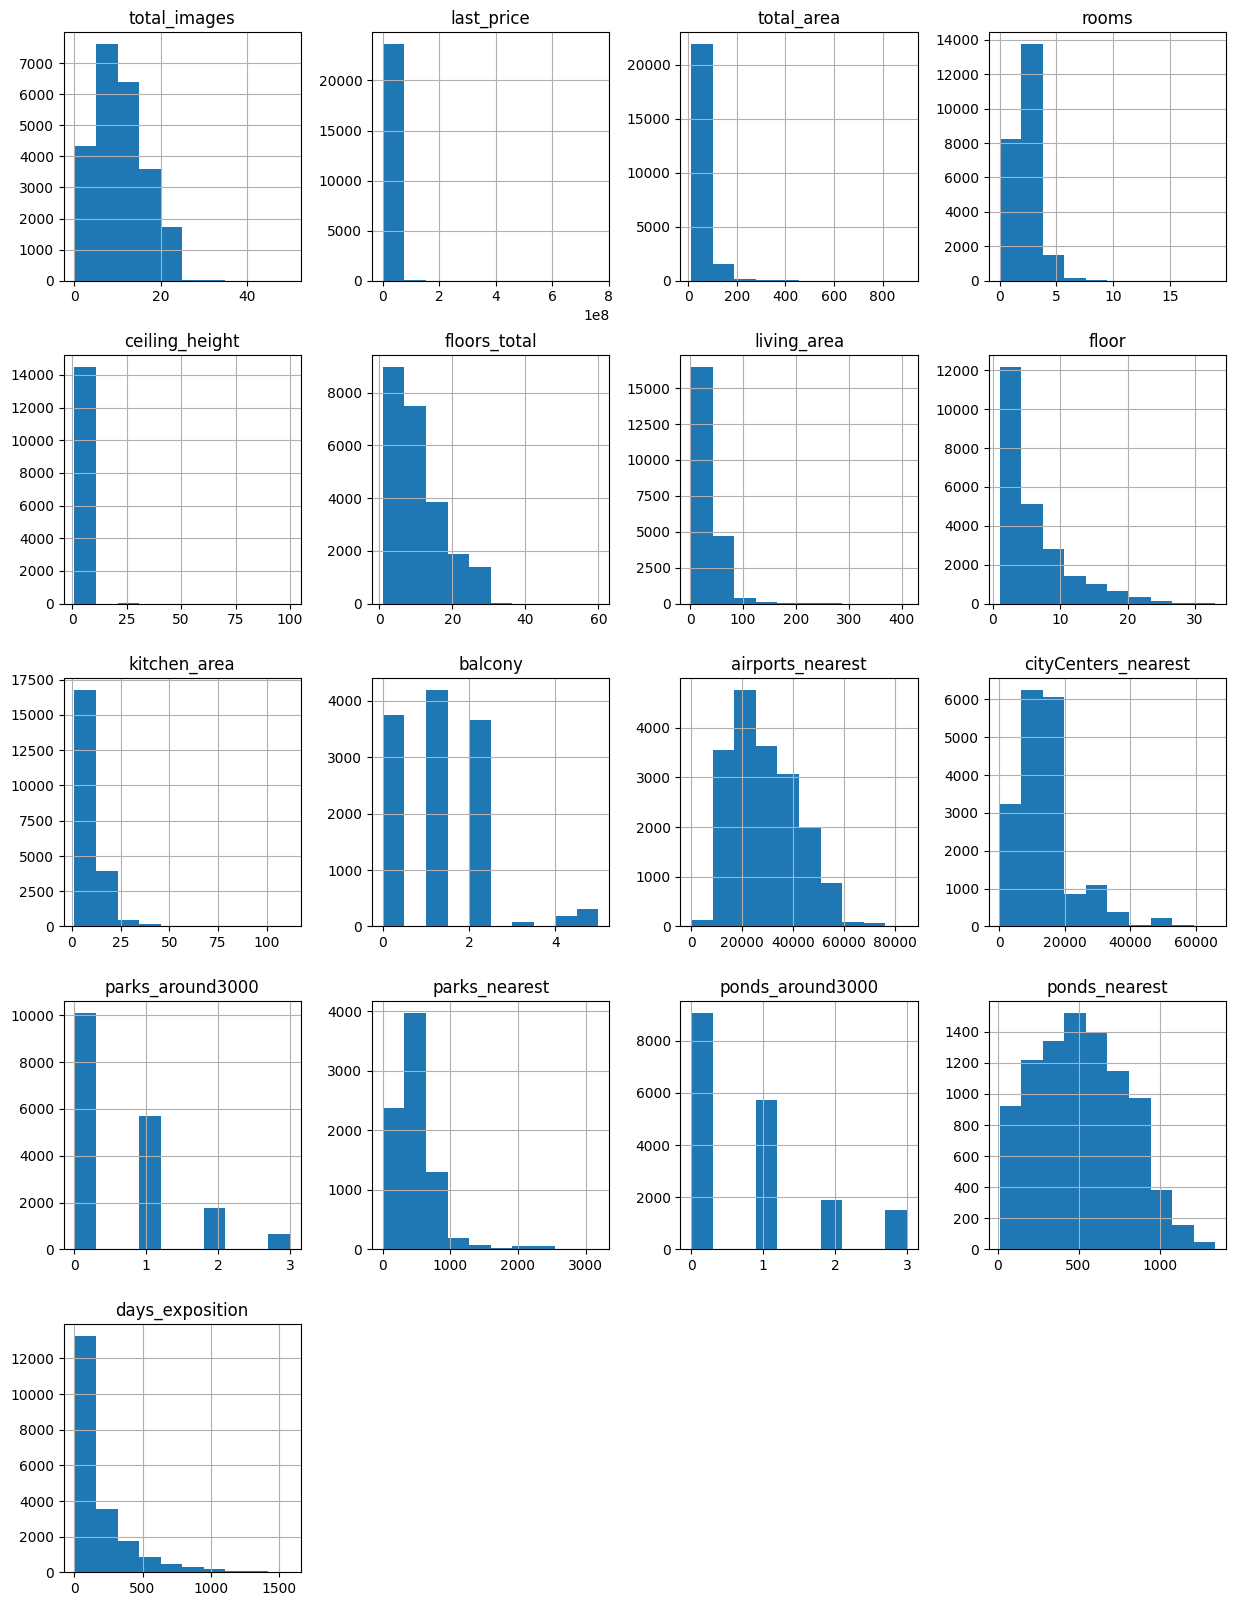

In [5]:
data.hist(figsize=(15, 20));

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
#Переименуем столбец к привычному виду
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

В таблице 22 столбца и 23699 строк. Есть пропуски и скорее всего есть выбросы в столбцах *last_price, total_area, ceiling_height, rooms, kitchen_area, living_area, floors_total.*

### Предобработка данных

#### Обработка пропусков

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

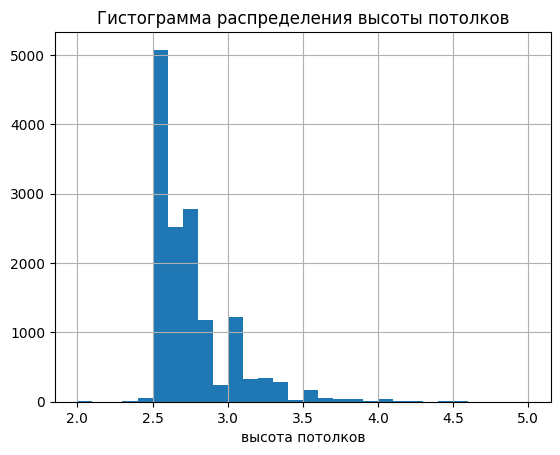

In [9]:
data['ceiling_height'].hist(range=(2,5), bins=30)
plt.title('Гистограмма распределения высоты потолков')
plt.xlabel('высота потолков');

In [10]:
# Пропуски в значениях высоты потолков можно заполнить наиболее частотным - 2.5
data['ceiling_height'] = data['ceiling_height'].fillna(2.5)

In [11]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
    
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

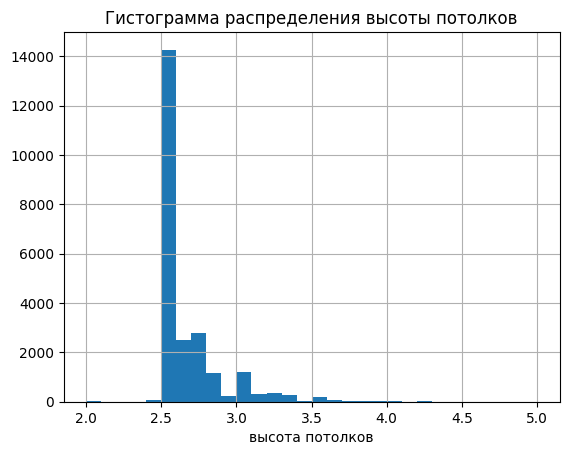

In [12]:
data['ceiling_height'].hist(range=(2,5), bins=30)
plt.title('Гистограмма распределения высоты потолков')
plt.xlabel('высота потолков');

In [13]:
# Отбрасываем 86 строк с пропусками в столбце floors_total
data = data.dropna(subset=['floors_total'])

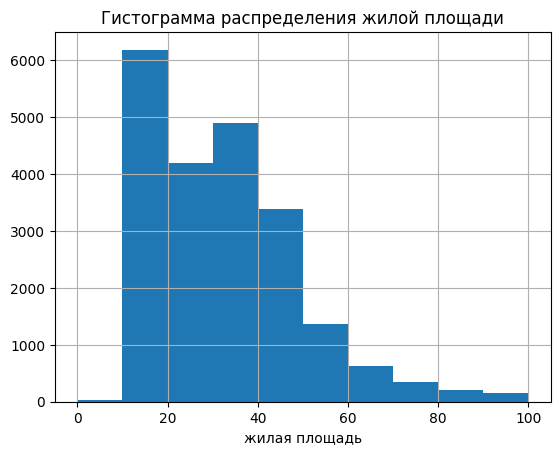

In [14]:
data['living_area'].hist(range=(0, 100))
plt.title('Гистограмма распределения жилой площади')
plt.xlabel('жилая площадь');

In [15]:
# Пропуски в значениях площади заполним медианами по группам по количеству комнат
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))

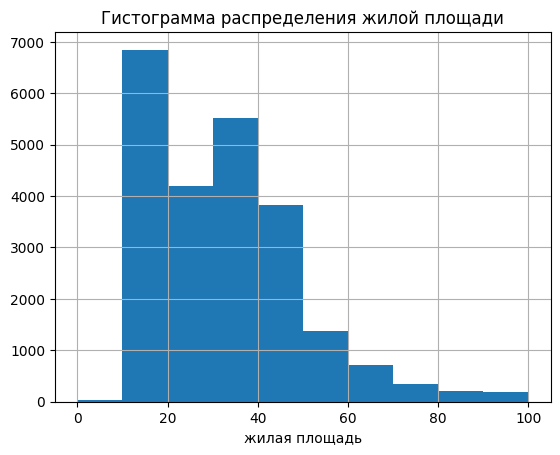

In [16]:
# Проверим, что данные не исказились после заполнения
data['living_area'].hist(range=(0, 100))
plt.title('Гистограмма распределения жилой площади')
plt.xlabel('жилая площадь');

In [17]:
# Скорее всего отсутствие значений в столбце 'is_apartment' указывает на то, что объект не является апартаментами
data['is_apartment'] = data['is_apartment'].fillna(False)

In [18]:
# Отсутствие данных в столбце 'balcony' примем за отсутствие балконов
data['balcony'] = data['balcony'].fillna(0)

In [19]:
# Пропуски в названиях населенных пунктов заполним как неизвестные
data['locality_name'] = data['locality_name'].fillna('Unknown')

**Заполнение пропусков в столбце** ***kitchen_area:***

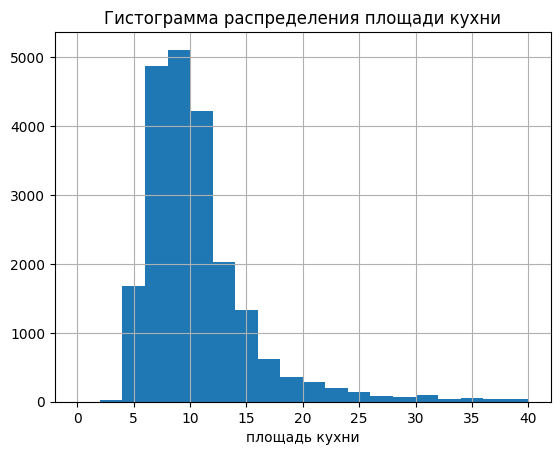

In [20]:
data['kitchen_area'].hist(range=(0, 40), bins=20)
plt.title('Гистограмма распределения площади кухни')
plt.xlabel('площадь кухни');

In [21]:
#Посмотрим на строки с пропусками в площади кухни
data[data['kitchen_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.5,14.0,45.0,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.5,9.0,17.6,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,30.5,1,False,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.5,22.0,17.6,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.5,13.0,17.6,13,False,...,NaN,0.0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


Площадь кухни входит в разность общей и жилой площади. Вычислим эту разность, добавим в новый столбец 'non_liv_area' и посмотрим зависимосить площади кухни от нее:

In [22]:
data['non_liv_area'] = data['total_area'] - data['living_area']

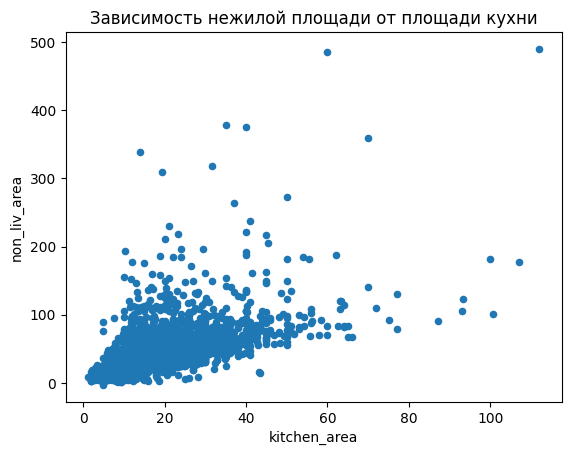

In [23]:
data.plot(kind='scatter', x='kitchen_area', y='non_liv_area')
plt.title('Зависимость нежилой площади от площади кухни');

In [24]:
# Посмотрим на примерах как соотносится площадь кухни и "нежилая" площадь
data.loc[: ,['kitchen_area', 'non_liv_area']].head(10)

,kitchen_area,non_liv_area
0,25.00,57.00
1,11.00,21.80
2,8.30,21.70
3,NaN,114.00
4,41.00,68.00
5,9.10,16.00
6,14.40,26.70
7,18.90,41.10
8,8.81,17.73
9,6.50,17.40


In [25]:
# Вычислим отношение "нежилой" площади к площади кухни
data['k'] = data['non_liv_area'] / data['kitchen_area']

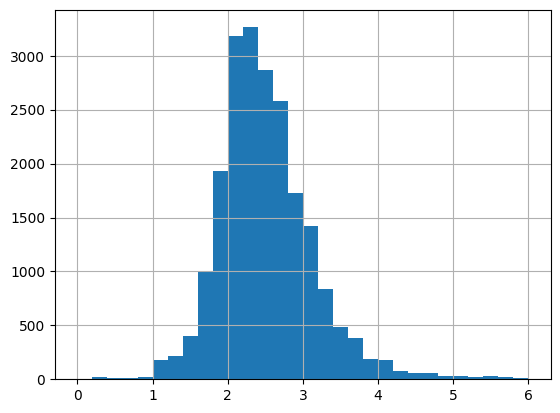

In [26]:
# Посмотрим как распределяется величина этого коэффициента
data['k'].hist(range=(0,6), bins=30);

In [27]:
data['k'].describe()

count    21382.000000
mean         2.529471
std          0.789664
min         -0.600000
25%          2.087500
50%          2.428571
75%          2.833333
max         24.410072
Name: k, dtype: float64

In [28]:
# Заполним пропуски отношением "нежилой" площади к медиане коэффициента
data['kitchen_area'] = data['kitchen_area'].fillna(data['non_liv_area'] / data['k'].median())

In [29]:
#Проверим, возможно получились отрицательные значения в площадях кухни
data[data['kitchen_area'] < 0]['kitchen_area'].count()

28

In [30]:
#Можно отбросить эти 28 строк.
data = data[data['kitchen_area'] >= 0]

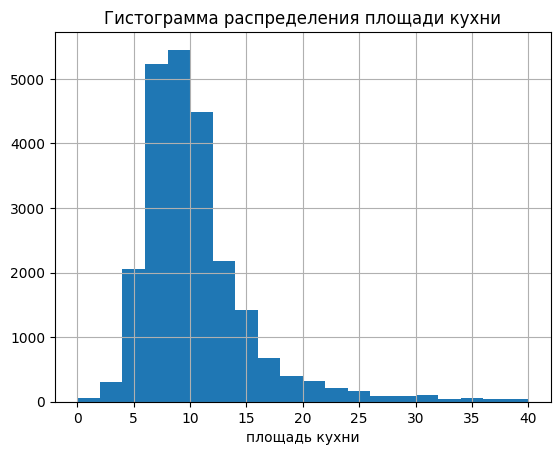

In [31]:
#Как изменилось распределение значений после заполнения пропусков
data['kitchen_area'].hist(range=(0, 40), bins=20)
plt.title('Гистограмма распределения площади кухни')
plt.xlabel('площадь кухни');

In [32]:
data['kitchen_area'].describe()

count    23585.000000
mean        10.553462
std          6.643077
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        196.205882
Name: kitchen_area, dtype: float64

Отсюда видно, что распределение значений практически не изменилось, значит заполнение пропусков не испортило исходные данные. 

In [33]:
#Проверка того, что не изменились исходные значения в площадях кухни
data.loc[:, :'kitchen_area'].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.000000
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.50,11.0,18.6,1,False,False,False,11.000000
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.50,5.0,34.3,4,False,False,False,8.300000
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.50,14.0,45.0,9,False,False,False,46.941176
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.000000


In [34]:
#Проверка как заполнились пропуски: пропуски были в строках с индексами 30,37,44
data.loc[[30, 37, 44], ['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
30,32.8,17.6,6.258824
37,45.8,30.5,6.300000
44,40.0,17.6,9.223529


In [35]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5521
city_centers_nearest     5498
parks_around3000         5497
parks_nearest           15546
ponds_around3000         5497
ponds_nearest           14536
days_exposition          3171
non_liv_area                0
k                        2203
dtype: int64

<div style="border:solid blue 1px; padding: 10px"> 
Пропуски связаны с тем, что пользователи не внесли некоторые данные. К таким данным относятся количество балконов, высота потолков, площадь кухни, общее число этажей, жилая площадь, является ли объект апартаментами.      

Отсутствие картографических данных, скорее всего, - техническая ошибка.  
    
Оставшиеся пропуски оставим как есть, поскольку нет логичного и надежного способа их заполнить.

#### Преобразование типов данных

In [36]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,non_liv_area,k
998,10,2300000.0,30.60,2017-04-26T00:00:00,1,2.5,5.0,17.0,1,False,...,Петергоф,37242.0,32432.0,1.0,1731.0,3.0,407.0,162.0,13.60,2.472727
2501,16,8495000.0,85.00,2018-07-14T00:00:00,3,2.5,3.0,54.7,3,False,...,Санкт-Петербург,24281.0,3848.0,1.0,965.0,3.0,420.0,90.0,30.30,2.504132
14633,10,4650000.0,63.10,2018-03-19T00:00:00,2,2.7,9.0,33.1,7,False,...,посёлок Шушары,19739.0,30142.0,0.0,NaN,0.0,NaN,59.0,30.00,2.272727
13071,5,3700000.0,54.10,2017-09-25T00:00:00,3,2.5,3.0,45.0,1,False,...,Санкт-Петербург,23319.0,17889.0,1.0,503.0,0.0,NaN,71.0,9.10,NaN
16429,2,2460000.0,28.01,2017-08-17T00:00:00,0,2.5,17.0,18.1,5,False,...,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,15.0,9.91,NaN


In [37]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
non_liv_area            float64
k                       float64
dtype: object

In [38]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

In [39]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [40]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,non_liv_area,k
13885,3,5779000,43.0,2017-09-13,1,2.50,17,14.50,10,False,...,Санкт-Петербург,17657.0,8308.0,0.0,NaN,0.0,NaN,426.0,28.50,1.900000
3239,8,2300000,35.0,2017-09-22,1,2.50,17,19.00,11,False,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,225.0,16.00,2.285714
20926,18,8900000,46.0,2017-06-15,1,2.65,17,20.00,4,False,...,Санкт-Петербург,39474.0,12650.0,1.0,96.0,0.0,NaN,283.0,26.00,2.000000
16220,20,8900000,64.0,2017-12-04,2,2.75,11,35.77,2,False,...,Санкт-Петербург,34454.0,15553.0,1.0,674.0,2.0,526.0,NaN,28.23,2.433621
15335,6,7400000,82.1,2018-03-15,3,2.50,5,55.90,4,False,...,Санкт-Петербург,13617.0,9602.0,0.0,NaN,0.0,NaN,114.0,26.20,2.847826


In [41]:
data.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
non_liv_area                   float64
k                              float64
dtype: object

<div style="border:solid blue 1px; padding: 10px">
В столбце "дата публикации" изменили тип object на datetime. Такой тип позволяет выделить отдельно дни, месяцы и годы, что необходимо в дальнейшем исследовании.
    
В столбцах last_price, floors_total, balcony предполагаются только целочисленные значения, поэтому для удобства заменили на тип int.

#### Устранение дубликатов

In [42]:
# Проверим наличие явных дубликатов
data.duplicated().sum()

0

In [43]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [44]:
data['locality_name'].nunique()

365

In [45]:
def replace_names(old, new='поселок', column='locality_name'):
    try:
        data[column] = data[column].str.replace(old, new)
    except:
        pass

In [46]:
replace_names('ё', 'е')

In [47]:
names = ['городской поселок', 'коттеджный поселок', 'поселок городского типа',\
         'поселок при железнодорожной станции', 'поселок при станции' , 'поселок станции']
for value in names:
    replace_names(value)

In [48]:
replace_names('деревня Кудрово', 'Кудрово')
replace_names('поселок Мурино', 'Мурино')

In [49]:
sorted(data['locality_name'].unique())

['Unknown',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня

In [50]:
data['locality_name'].nunique()

317

<div style="border:solid blue 1px; padding: 10px">
В результате было устранено 48 дубликатов в названиях населенных пунктов.

#### Обработка аномалий

In [51]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,non_liv_area,k
count,23585.000000,2.358500e+04,23585.000000,23585.000000,23585.000000,23585.000000,23585.000000,23585.000000,23585.000000,23585.000000,18064.000000,18087.000000,18088.000000,8039.000000,18088.000000,9049.000000,20414.000000,23585.000000,21382.000000
mean,9.877125,6.543968e+06,60.357458,2.069705,2.666771,10.679372,34.307267,5.881280,10.553462,0.593725,28796.955492,14187.825012,0.611566,490.557532,0.770013,518.269312,181.004850,26.050191,2.529471
std,5.681968,1.090730e+07,35.657698,1.076914,0.997685,6.598009,21.688486,4.874752,6.643077,0.960664,12625.050470,8616.616302,0.802180,341.450875,0.939223,277.841017,219.759973,18.249516,0.789664
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,-3.000000,-0.600000
25%,6.000000,3.415000e+06,40.000000,1.000000,2.500000,5.000000,18.400000,2.000000,7.000000,0.000000,18582.000000,9233.500000,0.000000,288.000000,0.000000,294.000000,45.000000,17.000000,2.087500
50%,9.000000,4.650000e+06,52.000000,2.000000,2.500000,9.000000,30.300000,4.000000,9.000000,0.000000,26750.000000,13094.000000,0.000000,455.000000,1.000000,503.000000,95.500000,22.000000,2.428571
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.600000,8.000000,12.000000,1.000000,37250.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,232.000000,29.300000,2.833333
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,196.205882,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,490.300000,24.410072


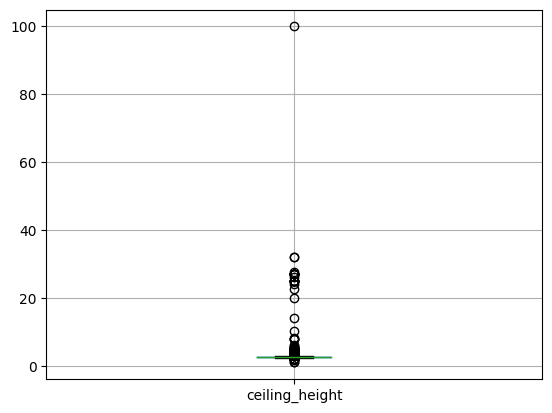

In [52]:
data.boxplot('ceiling_height');

In [53]:
# Значения высоты потолков от 20 м разделим на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20]['ceiling_height'] / 10

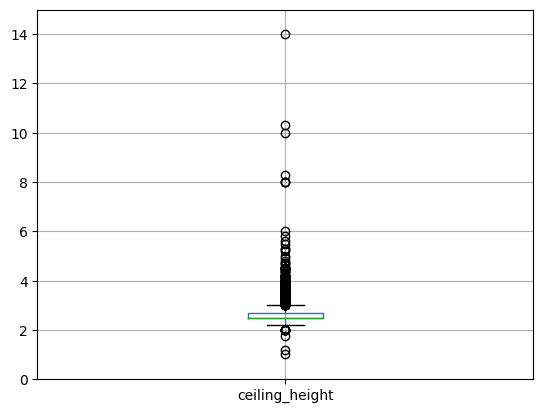

In [54]:
data.boxplot('ceiling_height')
plt.ylim(0, 15);

In [55]:
#Отбросим слишком выбивающиеся значения
data = data[data.ceiling_height <= 6]
data = data[data.ceiling_height >= 2]

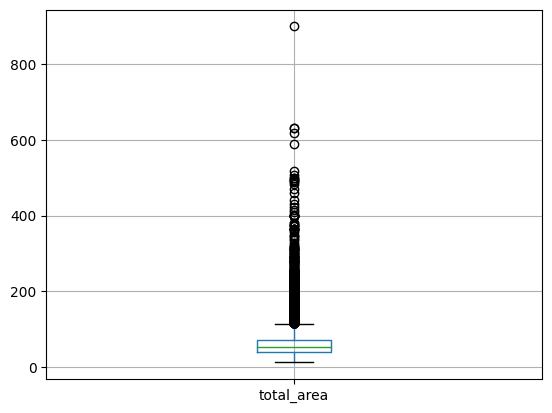

In [56]:
data.boxplot('total_area');

In [57]:
len(data[data.total_area >= 400])

26

In [58]:
# Отбросим выбросы в значениях общей площади
data = data[data.total_area < 400]

In [59]:
# Удалим строчки в которых жилая площадь больше, чем общая площадь
data = data.loc[data['non_liv_area'] > 0]

In [60]:
# Поищем строчки в которых площадь кухни больше "нежилой" площади 
(
    data
    .query('non_liv_area <= kitchen_area')
    .loc[:, ['total_area', 'living_area', 'kitchen_area','non_liv_area']]
)

,total_area,living_area,kitchen_area,non_liv_area
184,30.20,26.10,6.20,4.10
220,37.00,28.00,9.00,9.00
545,23.80,20.00,5.00,3.80
551,31.59,30.55,9.28,1.04
601,53.70,48.30,7.00,5.40
...,...,...,...,...
22399,54.80,39.50,15.30,15.30
22963,102.00,78.00,24.00,24.00
23202,67.92,63.00,13.04,4.92
23297,48.20,42.20,6.00,6.00


Для таких квартир некорректные данные площадей. Так как сложно определить в каких столбцах значения верные, и таких строк немного, можно их удалить.

In [61]:
data = data.loc[data['non_liv_area'] > data['kitchen_area']]

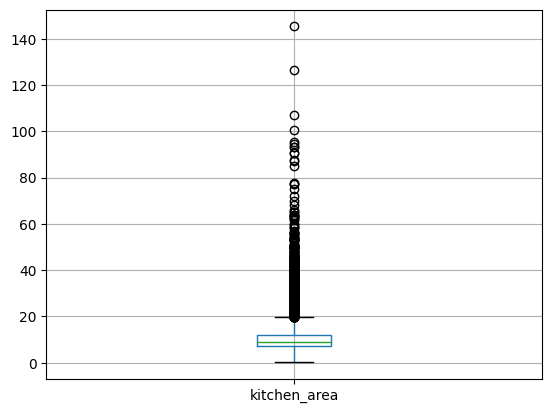

In [62]:
data.boxplot('kitchen_area');

In [63]:
len(data[data.kitchen_area >= 70])

19

In [64]:
# Удалим строки со значениями площади кухни 70 и более
data = data[data.kitchen_area < 70]

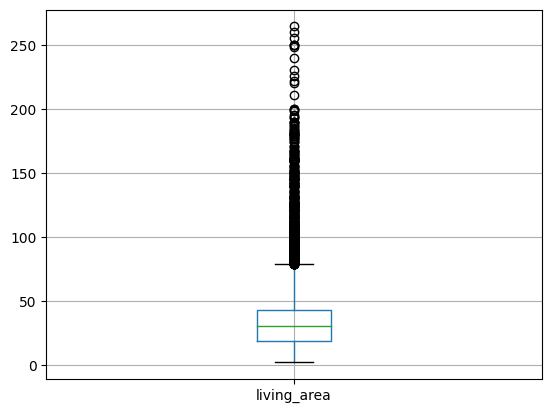

In [65]:
data.boxplot('living_area');

In [66]:
data = data[data.living_area < 200]

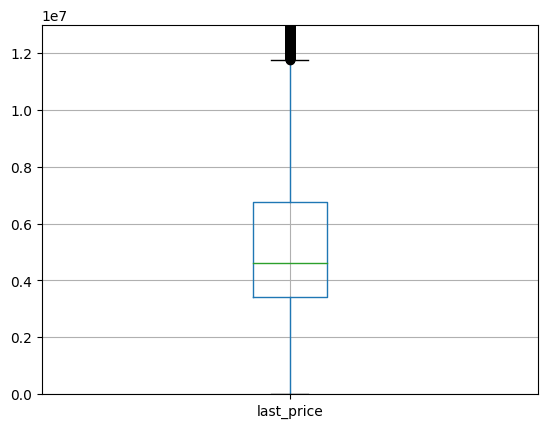

In [67]:
data.boxplot('last_price')
plt.ylim(0, 13000000);

In [68]:
len(data.query('last_price > 100000000'))

21

In [69]:
# Удалим сильно выбивающиеся значения - более 100 млн
data = data[data.last_price <= 100000000]

In [70]:
data['last_price'].describe()

count    2.335500e+04
mean     6.168376e+06
std      6.025991e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.610000e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64

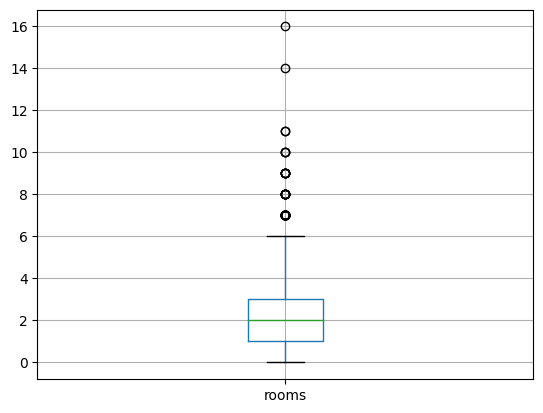

In [71]:
data.boxplot('rooms');

In [72]:
# Удалим квартиры с более чем 9 комнатами.
data = data[data.rooms < 10]

In [73]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,non_liv_area,k
count,23348.000000,2.334800e+04,23348.000000,23348.000000,23348.000000,23348.000000,23348.000000,23348.000000,23348.000000,23348.000000,17885.000000,17906.000000,17907.000000,7932.000000,17907.000000,8947.000000,20211.000000,23348.000000,21166.000000
mean,9.865213,6.162252e+06,59.392173,2.056450,2.636842,10.687468,33.760319,5.880589,10.372137,0.592599,28818.436064,14235.646208,0.607137,491.673853,0.766348,519.273164,180.751274,25.631854,2.534768
std,5.670591,6.014912e+06,30.547914,1.033089,0.237484,6.593179,19.331244,4.875479,5.627490,0.959112,12650.244371,8617.133195,0.797951,341.482563,0.935732,277.894677,219.331113,14.878771,0.743134
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.111176,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.270000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.300000,2.000000,7.000000,0.000000,18557.000000,9289.000000,0.000000,288.000000,0.000000,295.000000,45.000000,17.000000,2.094918
50%,9.000000,4.600000e+06,52.000000,2.000000,2.500000,9.000000,30.200000,4.000000,9.000000,0.000000,26773.000000,13123.000000,0.000000,455.500000,0.000000,503.000000,96.000000,22.000000,2.433333
75%,14.000000,6.750000e+06,69.300000,3.000000,2.700000,16.000000,42.400000,8.000000,12.000000,1.000000,37310.000000,16311.000000,1.000000,613.000000,1.000000,732.000000,232.000000,29.200000,2.833333
max,50.000000,9.900000e+07,398.000000,9.000000,5.800000,60.000000,199.000000,33.000000,68.147059,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,318.100000,18.947059


In [74]:
round(len(data) / 23699, 3)

0.985

<div style="border:solid blue 1px; padding: 10px">
Удалены аномально маленькие значения высоты потолков (меньше 2м) и большие значения в столбцах: "высота потолков", "общая площадь", "площадь кухни", "жилая площадь", "цена", "количество комнат".          

Исключены аномалии связанные с отношениями площадей:   
- жилая площадь больше, чем общая площадь; 
- площадь кухни больше "нежилой площади".
    
После предобработки и удаления строк потеряно 1,5% исходных данных.

### Добавление в таблицу необходимых столбцов

In [75]:
data['price_per_m'] = data['last_price'] / data['total_area'] 

In [76]:
data['day_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [77]:
def set_floor_type(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [78]:
data['floor_type'] = data.apply(set_floor_type, axis=1)

In [79]:
# Проверка как сработала функция
data['floor_type'].value_counts()

другой       17193
последний     3276
первый        2879
Name: floor_type, dtype: int64

In [80]:
data['city_centers_km'] = round(data['city_centers_nearest'] / 1000)

In [81]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,non_liv_area,k,price_per_m,day_week,month,year,floor_type,city_centers_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,57.0,2.280000,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.50,11,18.6,1,False,...,NaN,81.0,21.8,1.981818,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.50,5,34.3,4,False,...,574.0,558.0,21.7,2.614458,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.50,14,45.0,9,False,...,234.0,424.0,114.0,NaN,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,68.0,1.658537,100000.000000,1,6,2018,другой,8.0


<div style="border:solid blue 1px; padding: 10px">

Добавлены новые столбцы:  
- 'price_per_m' - цена одного квадратного метра;
- 'day_week' - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- 'month' - месяц публикации объявления;
- 'year' - год публикации объявления;
- 'floor_type' - тип этажа квартиры;
- 'city_centers_km' - расстояние до центра города в километрах.

### Исследовательский анализ данных

#### Изучение основных параметров объектов

In [82]:
def show_plot(column, lim, number=30):
    return data[column].plot(kind='hist', title=column, grid=True, bins=number, range=lim);

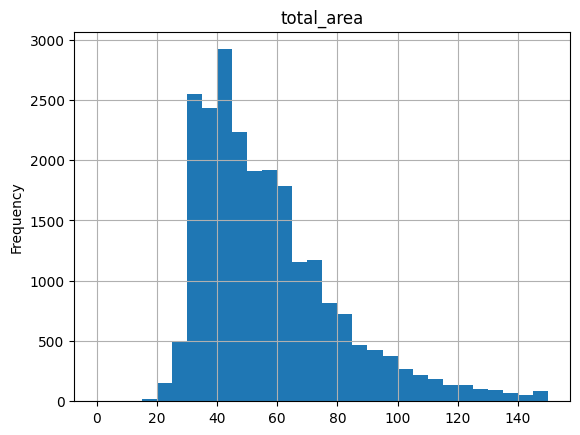

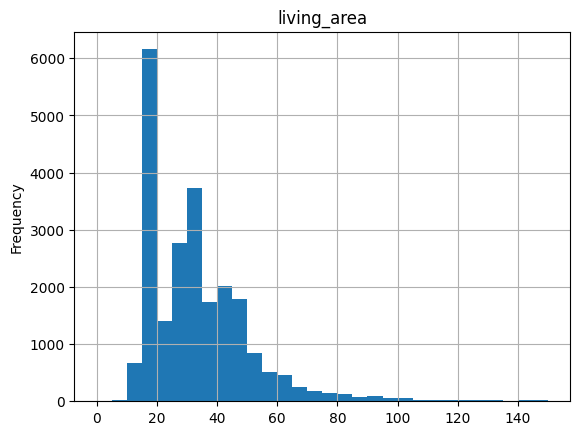

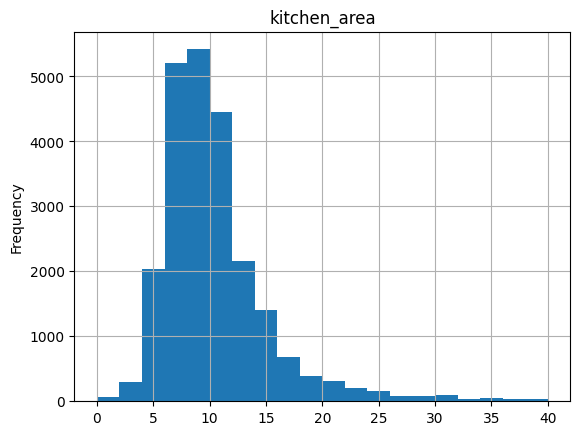

In [83]:
show_plot('total_area', (0, 150))
plt.show()
show_plot('living_area', (0, 150))
plt.show()
show_plot('kitchen_area', (0, 40), 20)
plt.show()

<div style="border:solid blue 1px; padding: 10px">

Наиболее типичные квартиры характеризуются:  
- общей площадью около 45 кв.м;
- жилой площадью около 20 кв.м;
- площадью кухни около 10 кв.м.

Основная часть квартир в продаже:
- общей площадью от 20 до 120 кв.м;
- c жилой площадью от 10 до 60 кв.м;
- с площадью кухни 5-20 кв.м.

Распределение жилой площади квартир, представленное выше, скорее всего можно объяснить "типичностью" построек домов и планировок однокомнатных квартир и квартир с большим количеством комнат.

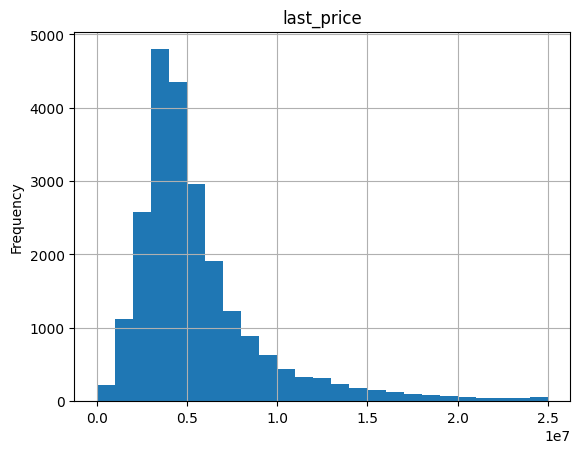

In [84]:
show_plot('last_price', (0, 25000000), 25);

<div style="border:solid blue 1px; padding: 10px">
Стоимость большинства квартир - до 10 млн. Наиболее часто цена квартир составляет от 3 до 5 млн. 

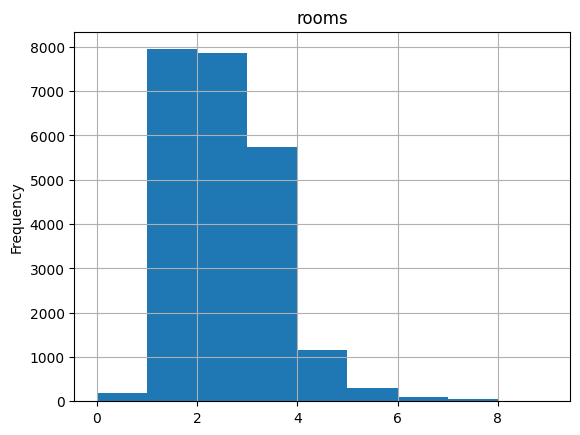

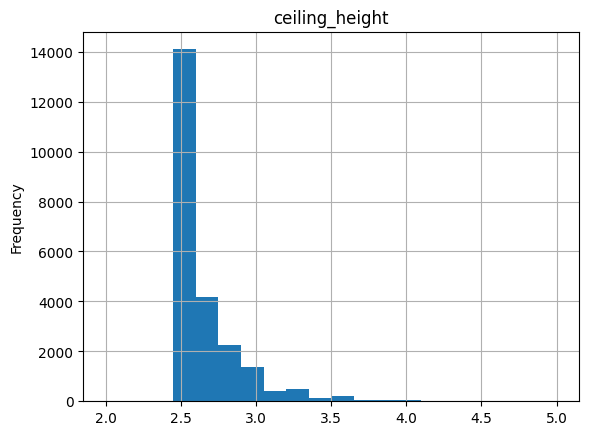

In [85]:
show_plot('rooms', (0, 9), 9)
plt.show()
show_plot('ceiling_height', (2, 5), 20)
plt.show()

<div style="border:solid blue 1px; padding: 10px">
Чаще всего продают однокомнатные и двухкомнатные квартиры, чуть менее "популярные" - трехкомнатные.  
    
Практически во всех квартирах высота потолков от 2.5 м. Преимущественно высота потолков составляет 2.5 м.

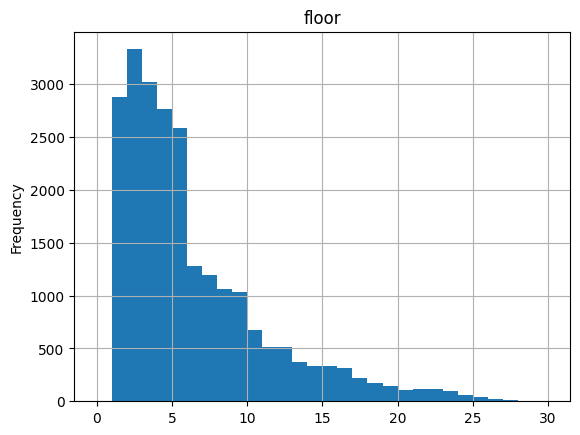

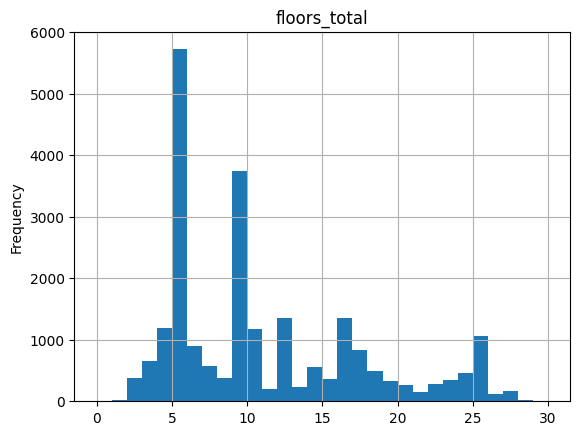

In [86]:
show_plot('floor', (0, 30))
plt.show()
show_plot('floors_total', (0, 30))
plt.show()

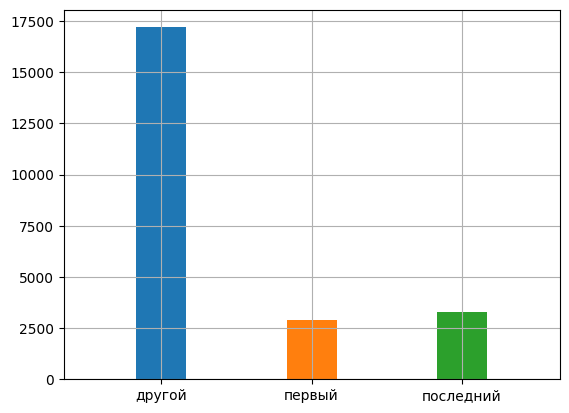

In [87]:
data.groupby('floor_type')['floor_type'].hist(bins=3);

<div style="border:solid blue 1px; padding: 10px">
Большинство продаваемых квартир находятся:
    
- на 2 этаже;
- в 5-этажных домах;
- на этажах между первым и последним.

Квартиры на последнем этаже продают чаще, чем на первом. Кроме 5-этажных домов, широко представлены квартиры в 9-этажных домах.
Количество квартир, расположенных на этажах с 1 по 6, не сильно отличается от этажа к этажу, при этом на каждом из них квартир более чем в 2 раза больше по сравнению с квартирами, расположенными на любом из этажей выше 6. 

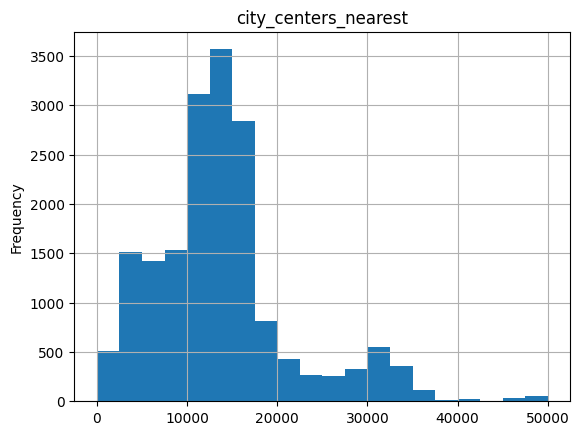

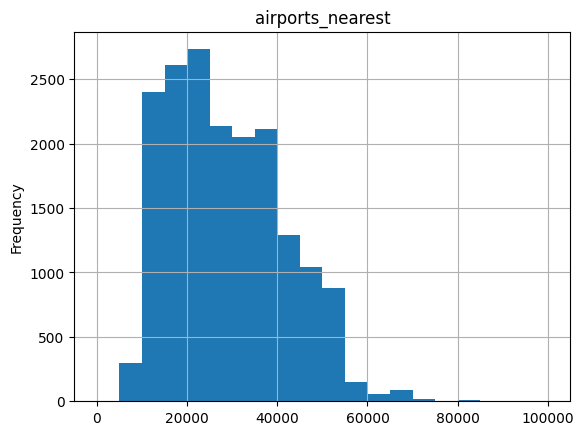

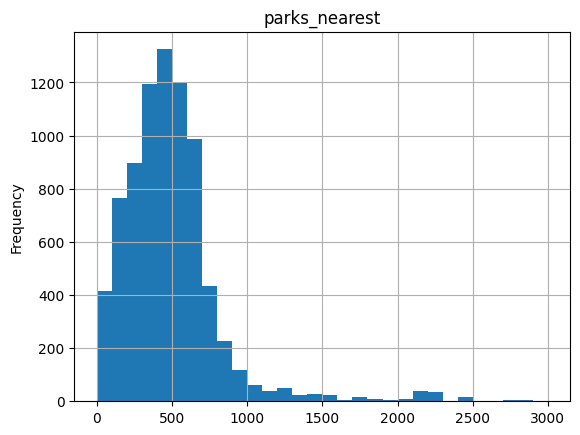

In [88]:
show_plot('city_centers_nearest', (0, 50000), 20)
plt.show()
show_plot('airports_nearest', (0, 100000), 20)
plt.show()
show_plot('parks_nearest', (0, 3000))
plt.show()

<div style="border:solid blue 1px; padding: 10px">
Среди тех квартир, для которых были предоставлены данные, большая часть расположена не далее 20 км от центра города, чаще всего - от 10 до 17 км; в 15-25 км от ближайшего аэропорта; в 400-600 м от ближайшего парка. Практически от всех представленных квартир до ближайшего парка не более 1 км и не более 55 км до ближайшего аэропорта.

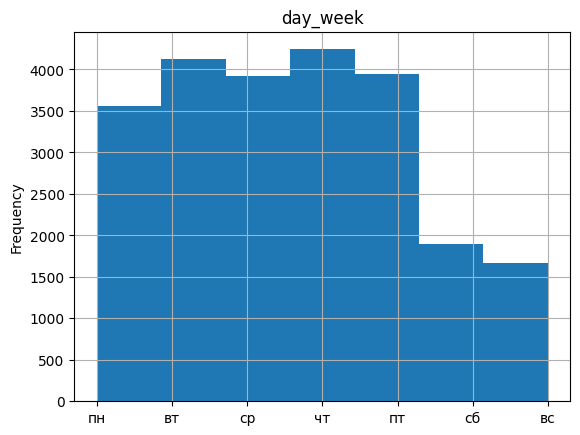

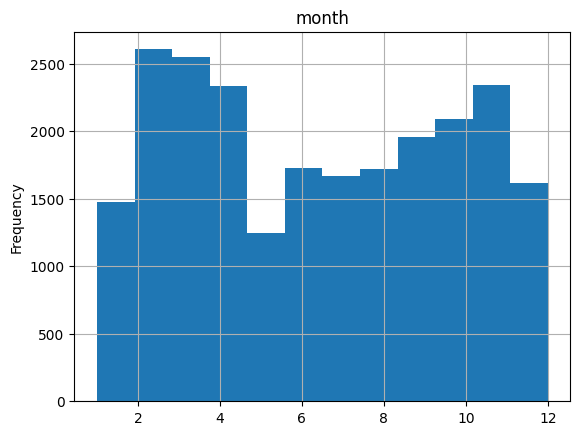

In [89]:
show_plot('day_week', (0, 6), 7)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["пн", "вт", "ср", "чт", "пт", "сб", "вс"])
plt.show()
show_plot('month', (1, 12), 12)
plt.show()

<div style="border:solid blue 1px; padding: 10px">
В будний день выставлялось практически в 2 раза больше объявлений, чем в выходной день. Чаще всего в четверг.  
Меньше всего квартир выставляли на продажу в мае, больше всего в феврале и марте. В летние месяцы количество объявлений практически не менялось.

#### Как быстро продавались квартиры

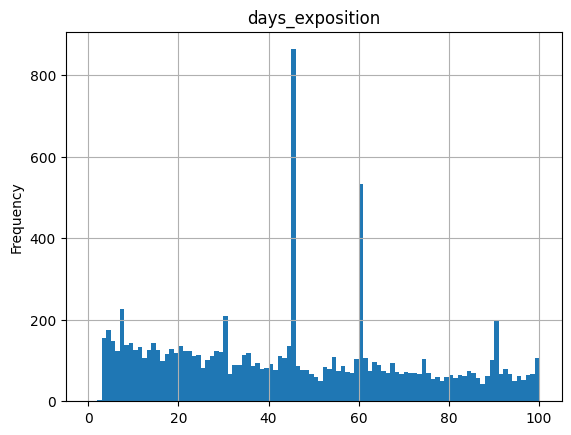

In [90]:
show_plot('days_exposition', (0, 100), 100);

In [91]:
data["days_exposition"].describe()

count    20211.000000
mean       180.751274
std        219.331113
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div style="border:solid blue 1px; padding: 10px">
Среднее значение дней в продаже - 181  
    
Медианное значение дней в продаже - 96  
  
Обычно продажа занимает почти 100 дней. Если квартира продалась менее чем за 45 дней, можно считать это быстрой продажей. Более 232 дней - долгая продажа.   
Интересно, что в 45-й и 60-й день объявления снимались чаще, чем в другие дни, возможно это связано с условиями размещения объявления на сайте. 

#### Какие факторы больше всего влияют на общую стоимость объекта?

##### Влияние общей, жилой и площади кухни на стоимость

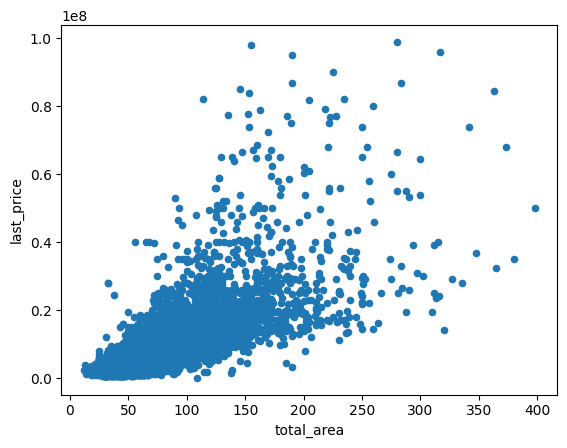

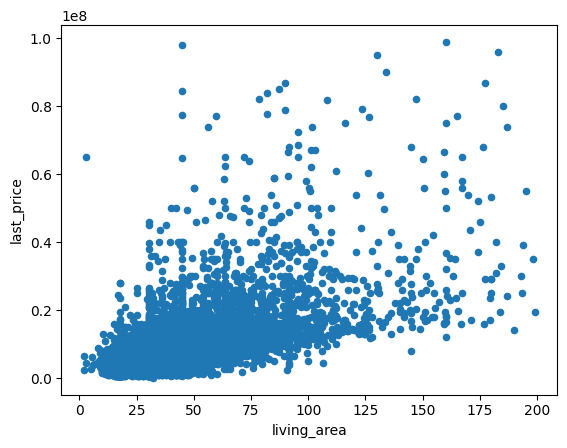

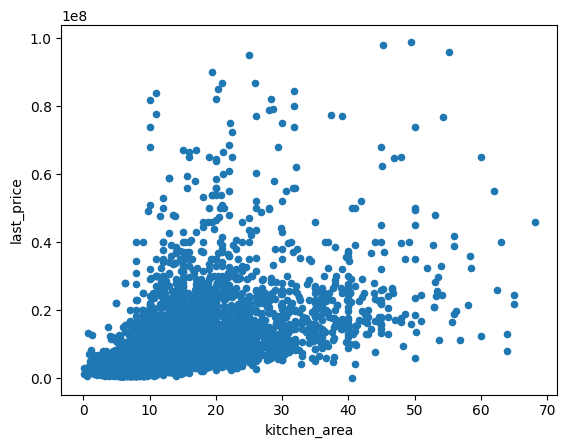

In [92]:
columns = ['total_area', 'living_area', 'kitchen_area']
for value in columns:
    data.plot(kind='scatter', x=value, y='last_price');

In [93]:
for value in columns:
    print(data['last_price'].corr(data[value]))

0.7576620260904936
0.6445558723323672
0.5907605624738749


Общая площадь в большей степени влияет на стоимость, чем жилая площадь и площадь кухни, при этом жилая площадь влияет сильнее, чем площадь кухни.

##### Влияние количества комнат на стоимость

In [94]:
data.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'count'])

,mean,count
,last_price,last_price
rooms,,
0,2.993621e+06,191
1,3.833300e+06,7945
2,5.541794e+06,7860
3,7.992873e+06,5747
4,1.227169e+07,1148
5,1.839740e+07,305
6,2.361590e+07,95
7,2.399610e+07,41


Уберем из рассмотрения 7-,8-,9-комантные квартиры, т.к. их слишком мало для сравнения.

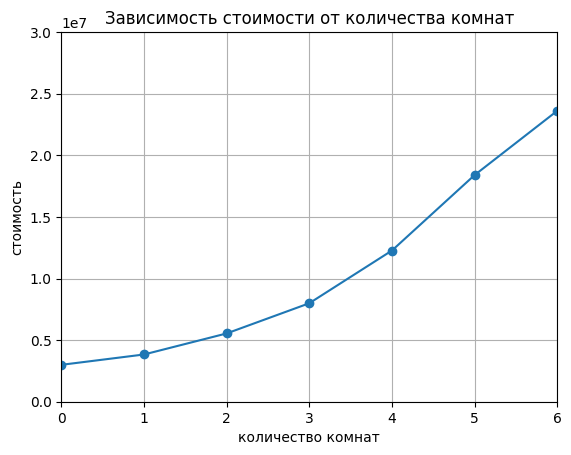

In [95]:
(data
    .pivot_table(index='rooms', values='last_price', aggfunc='mean')
    .plot(style='o-', ylim=(0, 30000000), xlim=(0,6), grid=True, legend=False)
)
plt.title('Зависимость стоимости от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('стоимость');

Наблюдается сильная зависимость общей стоимости от количества комнат, причем увеличение цены растет сильнее с увеличением количества комнат. Так, например, разница в стоимости между 3х-комнатной и 2х-комнатной квартирой - 2,5 млн, а между 4х-комантной и 3х-комнатной - 4,3 млн. 

##### Влияние типа этажа на стоимость

In [96]:
data.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'count'])

,median,count
,last_price,last_price
floor_type,,
другой,4800227,17193
первый,3900000,2879
последний,4300000,3276


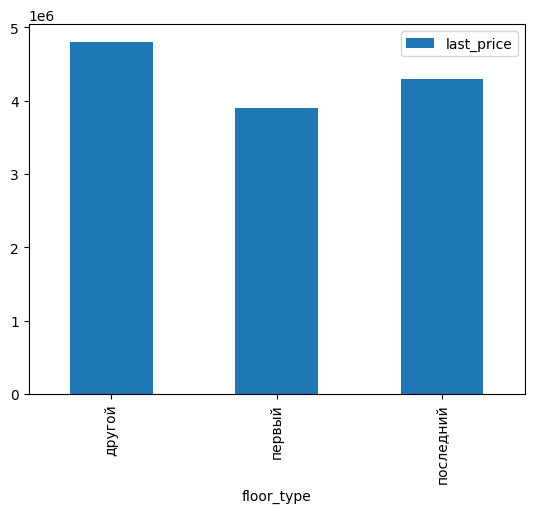

In [97]:
(data
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(kind='bar')
);

Самая низкая стоимость у квартир на первом этаже, они стоят на 0,5 млн дешевле, чем квартиры на последнем этаже и почти на 1 млн дешевле, чем на промежуточных этажах. При этом цена квартир на последнем этаже почти на 0,5 млн меньше, чем на этажах между первым и последним. 

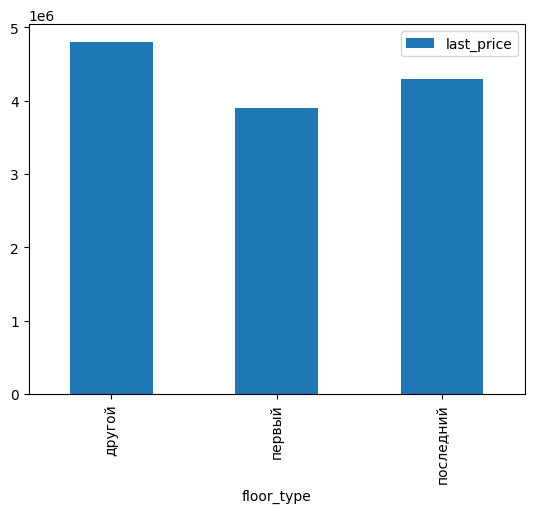

In [98]:
(data
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(kind='bar')
);

##### Влияние даты размещения объявления на стоимость

In [99]:
data.pivot_table(index='day_week', values='last_price', aggfunc=['median','count'])

,median,count
,last_price,last_price
day_week,,
0,4650000,3560
1,4700000,4125
2,4700000,3915
3,4620000,4243
4,4550000,3948
5,4506000,1896
6,4550000,1661


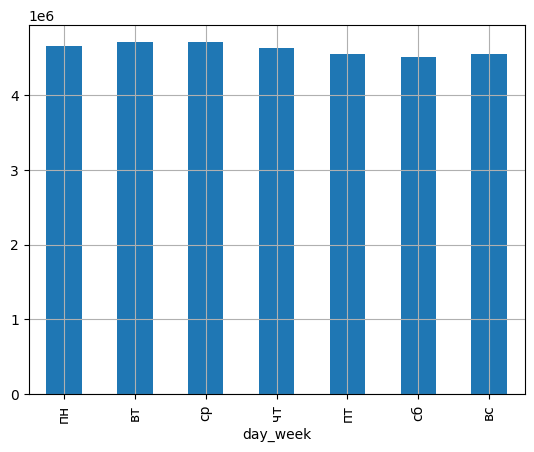

In [100]:
(data
    .pivot_table(index='day_week', values='last_price', aggfunc='median')
    .plot(kind='bar', legend=False, grid=True)
)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["пн", "вт", "ср", "чт", "пт", "сб", "вс"]);

In [101]:
data.pivot_table(index='month', values='last_price', aggfunc=['median','count'])

,median,count
,last_price,last_price
month,,
1,4600000,1478
2,4650000,2607
3,4650000,2550
4,4800000,2335
5,4500000,1248
6,4400000,1731
7,4600000,1667
8,4550000,1721


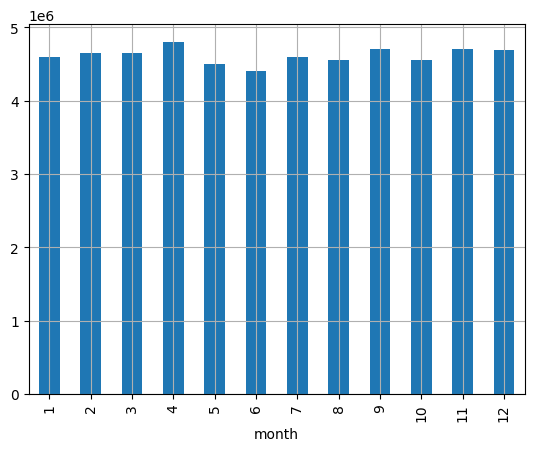

In [102]:
(data
    .pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, legend=False)
);

Стоимость квартир практически не зависит от дня публикации объявления. Чуть выше стоимость наблюдается в объявлениях, выложенных во вторник и среду, разница с выходными днями составляет меньше 200 тыс.   
Дешевле квартиры продавали в июне и мае, дороже всего - в апреле, с разницей около 300 тыс.

In [103]:
data.pivot_table(index='year', values='last_price', aggfunc=['median', 'count'])

,median,count
,last_price,last_price
year,,
2014,7700000,133
2015,5300000,1168
2016,4500000,2733
2017,4500000,8080
2018,4550000,8396
2019,5050000,2838


In [104]:
print(data['first_day_exposition'].min())
print(data['first_day_exposition'].max())

2014-11-27 00:00:00
2019-05-03 00:00:00


Данных за 2014 год мало, корректнее их убрать из рассмотрения.

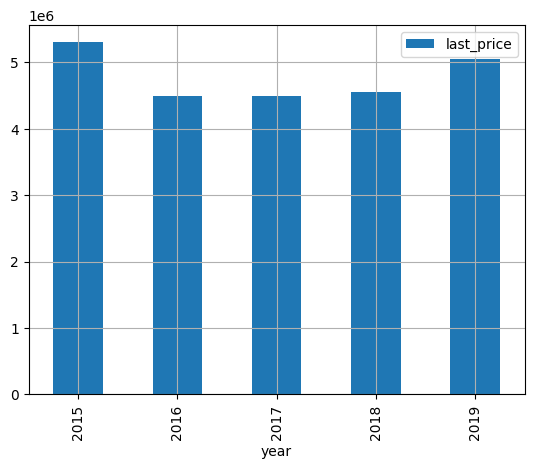

In [105]:
(data
    .query('year > 2014')
    .pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True)
);

Наблюдается снижение стоимости жилья в 2016 году по сравнению с предыдущим годом. В последующие годы стоимость практически не изменялась, а в 2019 году выросла.   
Чтобы правильнее объяснить такую динамику, рассмотрим изменение площади и цены за квадратный метр по годам:

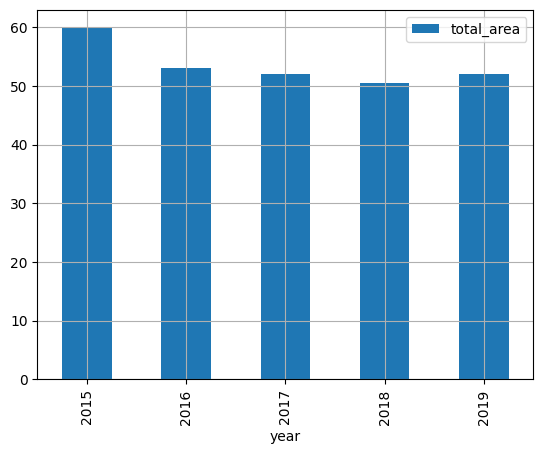

In [106]:
(data
    .query('year > 2014')
    .pivot_table(index='year', values='total_area', aggfunc='median')
    .plot(kind='bar', grid=True)
);

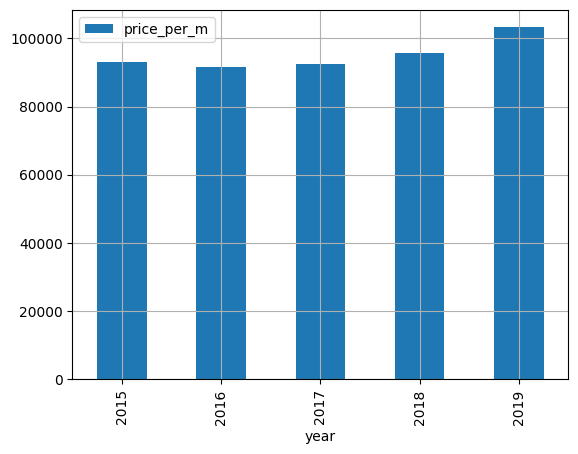

In [107]:
(data
    .query('year > 2014')
    .pivot_table(index='year', values='price_per_m', aggfunc='median')
    .plot(kind='bar', grid=True)
);

Снижение цены в 2016 году объясняется тем, что уменьшилась общая площадь продаваемых квартир. При рассмотрении динамики цены за квадратный метр, можно сказать, что с 2015 по 2017 год цена практически не менялась. В 2018 году стоимость незначительно выросла. Хотя данные за 2019 год представлены только до мая, за этот период общая цена выросла на 0,5 млн.

<div style="border:solid blue 1px; padding: 10px">
    
Сильнее всего на общую стоимость жилья влияют:  
- общая площадь;
- количество комнат, причем чем больше комнат тем сильнее растет цена;
- первый этаж, квартиры на первом этаже значительно дешевле (разница около 0,5 млн по сравнению с последним этажом и почти 1 млн с промежуточными этажами);

При этом цена квартир на последнем этаже почти на 0,5 млн меньше, чем на этажах между первым и последним.
    
С 2015 по 2017 год цена практически не менялась, в 2018 году незначительно выросла. В 2019 году наметился рост цены, хотя данные представлены только до мая, за этот период общая цена выросла на 0,5 млн.  
Стоимость квартиры не сильно зависит от дня недели и месяца публикации объявления. Дороже квартиры продавали в апреле, дешевле в июне и мае (разница около 300 тыс). Стоимость квартир, выставленных на продажу во вторник и среду, незначительно выше, чем в другие дни (разница менее 200 тыс по сравнению с выходными днями).

#### Цены за квадратный метр в разных населенных пунктах

In [108]:
price_locality = data.pivot_table(index='locality_name', values='price_per_m', aggfunc=['count', 'median'])
price_locality.columns = ['count', 'price_per_m']
price_locality['price_per_m'] = price_locality['price_per_m'].astype(int)

In [109]:
price_locality.sort_values(by='count', ascending=False).head(10)

,count,price_per_m
locality_name,,
Санкт-Петербург,15460,104628
Мурино,578,86115
Кудрово,467,95348
поселок Шушары,437,76666
Всеволожск,390,65789
Пушкин,368,99993
Колпино,337,74725
поселок Парголово,326,91579
Гатчина,303,67647


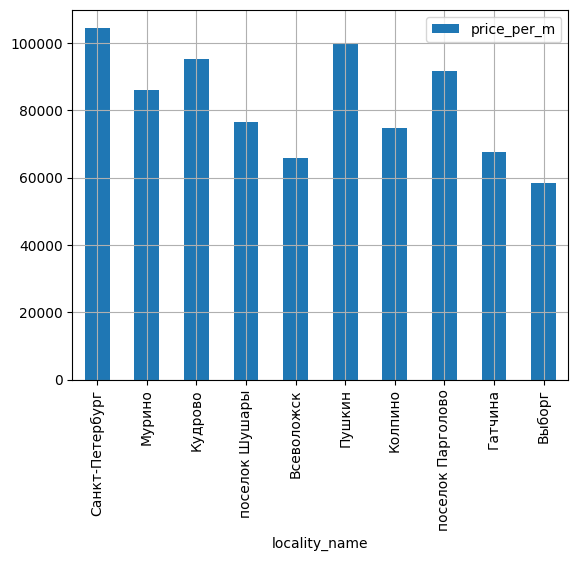

In [110]:
(
    price_locality.sort_values(by='count', ascending=False).head(10)
    .plot(kind='bar', y='price_per_m', grid=True)
);

<div style="border:solid blue 1px; padding: 10px">
Из 10 населённых пунктов с наибольшим числом объявлений наибольшая стоимость квадратного метра в Санкт-Петербурге - 104628, наименьшая - 58307 в Выборге.

#### Зависимость цены от близости к центру

In [111]:
(
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_km', values='price_per_m', aggfunc=['mean', 'count'])
)

,mean,count
,price_per_m,price_per_m
city_centers_km,,
0.0,209853.104620,23
1.0,154416.375913,182
2.0,148432.187714,301
3.0,121216.141374,344
4.0,127490.657926,672
5.0,137355.622897,887
6.0,144776.282089,599
7.0,153702.668561,412


Последним трем строчкам соответствует слишком маленькое число объявлений, лучше их не рассматривать.

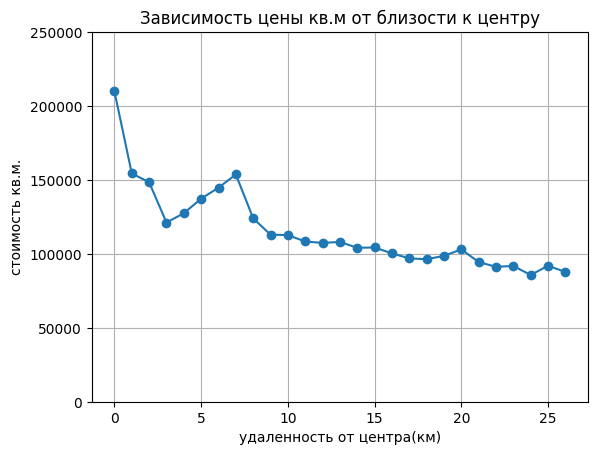

In [112]:
(
    data
    .query('locality_name == "Санкт-Петербург" and city_centers_km < 27')
    .pivot_table(index='city_centers_km', values='price_per_m', aggfunc='mean')
    .plot(ylim=(0, 250000), grid=True, style='o-', legend=False)
)
plt.title('Зависимость цены кв.м от близости к центру')
plt.xlabel('удаленность от центра(км)')
plt.ylabel('стоимость кв.м.');

<div style="border:solid blue 1px; padding: 10px">
Наблюдается логичная тенденция уменьшения стоимости квадратного метра с удаленностью от центра Санкт-Петербурга. 
На расстоянии от 4 км до 7 км от центра города наблюдается некоторое увеличение цены, возможно в эту область попадают более новые дома в районах с хорошо развитой инфраструктурой.  

### Общий вывод

<div style="border:solid blue 2px; padding: 10px">
    
 Были изучены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Выполнена предобработка данных, в том числе, удалены все пропуски в добавляемых пользователями данных; насколько возможно, устаненены аномалии и дубликаты, преобразованы типы данных. В результате предобработки устанено 1,5% некорректных данных. Произведены необходимые расчеты и добавлены в таблицу. Произведен исследовательский анализ, все результаты которого представлены ниже.  
    
По результатам исследования были выявлены **наиболее типичные в продаже квартиры:**    
- однокомнатные и двухкомнатные;
- общей площадью около 45 кв.м, с жилой площадью около 20 кв.м и площадью кухни около 10 кв.м;
- с высотой потолков 2,5 м;
- стоимостью от 3 до 5 млн.

При этом квартиры чаще всего находятся на 2 этаже, в 5-этажных домах в пределах 10-17 км от центра города, в 15-25 км от ближайшего аэропорта, в 400-600 м от ближайшего парка.   
    
**Основная часть продаваемых квартир:**
- имеют общую площадь от 20 до 120 кв.м, жилую площадь до 60 кв.м, площадь кухни 5-20 кв.м; 
- на этажах между первым и последним;  
- стоимостью не более 10 млн;
- с высотой потолков 2,5-3 м;
- с 1-3 комнатами;
- не далее 20 км от центра города, 1 км от ближайшего парка и 55 км от ближайшего аэропорта.  
    
Стоит отметить, квартиры на последнем этаже продают чаще, чем на первом этаже. Количество квартир на этажах с 1 по 6 не сильно варьируется между собой, при этом на каждом из этих этажей квартир более чем в 2 раза больше по сравнению с квартирами, расположенными на любом из этажей выше 6.  
Кроме 5-этажных домов, широкий выбор квартир в 9-этажных домах.
   
**Временные факторы:** 

В будний день выставляется практически в 2 раза больше объявлений, чем в выходной день, чаще всего в четверг. При этом стоимость практически не зависит от дня публикации объявления. Стоимость квартир, выставленных на продажу во вторник и среду, чуть выше, чем в другие дни (разница менее 200 тыс по сравнению с выходными днями).   
Меньше всего квартир выставляли на продажу в мае, больше всего в феврале и марте. При этом в мае и июне стоимость квартир немного дешевле, разница около 300 тыс по сравнению с самым "дорогим" месяцем - апрелем. В летние месяцы количество объявлений практически не менялось.  
    
С 2015 по 2017 год цена практически не менялась, в 2018 году незначительно выросла. В 2019 году наметился рост цены, хотя данные представлены только до мая, за этот период общая цена выросла на 0,5 млн.

Обычно продажа занимает почти 100 дней. Быстрая продажа происходит менее чем за 45 дней. Если квартира продается  более 232 дней, можно считать это долгой продажей. Медианное количество дней - 96, среднее - 181 день.
    
**Сильнее всего на общую стоимость жилья влияют такие факторы как:**
- общая площадь (влияет сильнее, чем жилая площадь и площадь кухни);
- количество комнат, причем чем больше комнат, тем сильнее растет цена;
- первый этаж, квартиры на первом этаже значительно дешевле (разница около 0,5 млн по сравнению с последним этажом и почти 1 млн с промежуточными этажами);
- расстояние от центра города и населенный пункт, в котором находится квартира. 
    
При этом квартир на последнем этаже почти на 0,5 млн меньше, чем на этажах между первым и последним.
    
Из 10 населённых пунктов с наибольшим числом объявлений наибольшая стоимость квадратного метра в Санкт-Петербурге - 104628, наименьшая - 58307 в Выборге.
    
Наблюдается логичная тенденция уменьшения стоимости квадратного метра с удаленностью от центра Санкт-Петербурга. Хотя на расстоянии от 4 км до 7 км от центра города наблюдается некоторое увеличение цены, возможно в эту область попадают более новые дома, в районах с хорошо развитой инфраструктурой.